# Hoja de trabajo 7: modelos de regresión logística
Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869  

Enlace de repositorio: https://github.com/angelargd8/HTD7-MDD 

In [2]:
import numpy
import pandas as pg
import matplotlib.pyplot as plt
#cargar los datos
import pandas as pd 
df_train = pd.read_csv("train.csv")

### Variables que no se tomarán en cuenta por falta de datos
No se tomarán en cuenta las siguiente variables porque tienen demasiados datos faltantes, según las respuestas anteriores, estar variables no nos serán de utilidad.   
Demasiados datos faltantes, irrelevante para el análisis   
- **Alley** 91 non-null / 1460 registros 
- **MasVnrType** 588 non-null / 1460
- **FireplaceQu** 770 non-null / 1460
- **PoolQC** 7 non-null / 1460
- **Fence** 281 non-null / 1460    
- **MiscFeature** 54 non-null / 1460

In [3]:
print(df_train.shape)
# Eliminar las columnas 
columnas_a_eliminar = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']  # Reemplaza con los nombres de las columnas que deseas eliminar
df_train = df_train.drop(columns=columnas_a_eliminar)
print(df_train.shape)
print("Se eliminaron un total de 6 columnas")

(1460, 81)
(1460, 75)
Se eliminaron un total de 6 columnas


### 1. Cree una variable dicotómica por cada una de las categorías de la variable respuesta categórica que creó en hojas anteriores. Debería tener 3 variables dicotómicas (valores 0 y 1) una que diga si la vivienda es cara o no, media o no, económica o no.

In [4]:
#calcular percentiles 33 y 66 %%
import seaborn as sns

df_train = pd.read_csv("train.csv")
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

low = df_train['SalePrice'].quantile(0.33)

medium = df_train['SalePrice'].quantile(0.66)

high = df_train['SalePrice'].max()

df_train['SalePrice_Class'] = pd.cut(df_train['SalePrice'], bins=[0, low, medium, high], labels=['Economic', 'Intermediate', 'High'])

print(df_train['SalePrice_Class'].value_counts())


SalePrice_Class
High            497
Economic        483
Intermediate    480
Name: count, dtype: int64


In [5]:
#creacion de 3 variables dicotomicas, con valores de 0 y 1 que diga si la vivienda es cara o no, media o no, economica o no 
dummy_economic = df_train['Economic'] = (df_train['SalePrice_Class'] == 'Economic').astype(int)
dummy_intermediate = df_train['Intermediate'] = (df_train['SalePrice_Class'] == 'Intermediate').astype(int)
dummy_high =df_train['High'] = (df_train['SalePrice_Class'] == 'High').astype(int)

#unir las variables dummy con el dataframe original
df_train = pd.concat([df_train, dummy_economic, dummy_intermediate, dummy_high], axis=1)
#verificamos que se hayan unido las variables
print(df_train[['SalePrice', 'Economic', 'Intermediate', 'High']].head(10))


   SalePrice  Economic  Intermediate  High
0     208500         0             0     1
1     181500         0             1     0
2     223500         0             0     1
3     140000         0             1     0
4     250000         0             0     1
5     143000         0             1     0
6     307000         0             0     1
7     200000         0             0     1
8     129900         1             0     0
9     118000         1             0     0


### 2. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

df_train = df_train.loc[df_numerico.index]
variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()
print("Variables numéricas:", variables_numericas)

X = df_numerico[variables_numericas].drop(columns=['SalePrice', 'SalePrice_Class', ''], errors='ignore')
y = df_train['High']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)

Variables numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Shape of X: (1121, 37)
Shape of y: (1121,)
Shape of X_train: (896, 37)


### 4. Elabore un modelo de regresión logística para conocer si una vivienda es cara o no, utilizando el conjunto de entrenamiento y explique los resultados a los que llega. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. Use validación cruzada. 

In [7]:
logReg = LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
y_proba = logReg.predict_proba(X_test)[:,1] # vector de probabilidades
cm = confusion_matrix(y_test,y_pred)

In [8]:
#cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logReg, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())

Cross-validation scores: [0.95       0.88826816 0.88826816 0.8603352  0.92178771]
Mean cross-validation score: 0.9017318435754189


Los resultados del cross validation, lo que nos indican los puntajes o el ¨scores¨ son la precision del modelo, de cada subconjunto. Y se observa que los puntajes estan dentro del rango de 0.86 a 0.95, hay cierta variavilidad, pero tiene buen rendimiento.
El promedio due de 0.90, lo que nos indica que el modelo precide bien el 90% de las veces. 

In [9]:
y_proba

array([1.36593901e-02, 5.40563155e-02, 3.21348752e-04, 1.05459201e-02,
       1.48551377e-01, 9.71028192e-01, 1.67599377e-02, 2.03117631e-02,
       7.85998391e-01, 2.04312734e-03, 1.50848116e-01, 9.99514431e-01,
       8.71731532e-01, 1.40873874e-02, 3.35029237e-03, 3.67714068e-03,
       5.24245439e-03, 5.73285221e-02, 5.59947777e-01, 2.22907035e-01,
       7.73460762e-01, 1.91974642e-03, 3.06236175e-04, 8.18117189e-01,
       3.90144165e-02, 3.69424178e-04, 9.99999922e-01, 7.14195808e-04,
       2.60549642e-02, 3.39271505e-02, 6.87057793e-01, 8.19786013e-01,
       2.56255720e-01, 9.90690035e-01, 9.98686992e-01, 3.07507732e-01,
       4.04513422e-01, 4.38401726e-02, 4.22882134e-01, 9.17057248e-05,
       6.44700107e-02, 9.41349012e-01, 3.25781165e-03, 1.23360644e-03,
       9.97579272e-01, 8.99137581e-01, 2.34933508e-03, 2.62187562e-01,
       1.60317572e-02, 1.01003426e-01, 3.04475569e-01, 9.72017979e-01,
       8.52253116e-02, 2.51265078e-01, 5.45055734e-01, 8.87077685e-01,
      

In [10]:
y_test

1297    0
132     0
300     0
1307    0
778     0
       ..
401     0
543     0
1062    0
1026    0
246     0
Name: High, Length: 225, dtype: int64

### 4. Analice el modelo. Determine si hay multicolinealidad en las variables, y cuáles son las que aportan al modelo, por su valor de significación. Haga un análisis de correlación de las variables del modelo y especifique si el modelo se adapta bien a los datos.

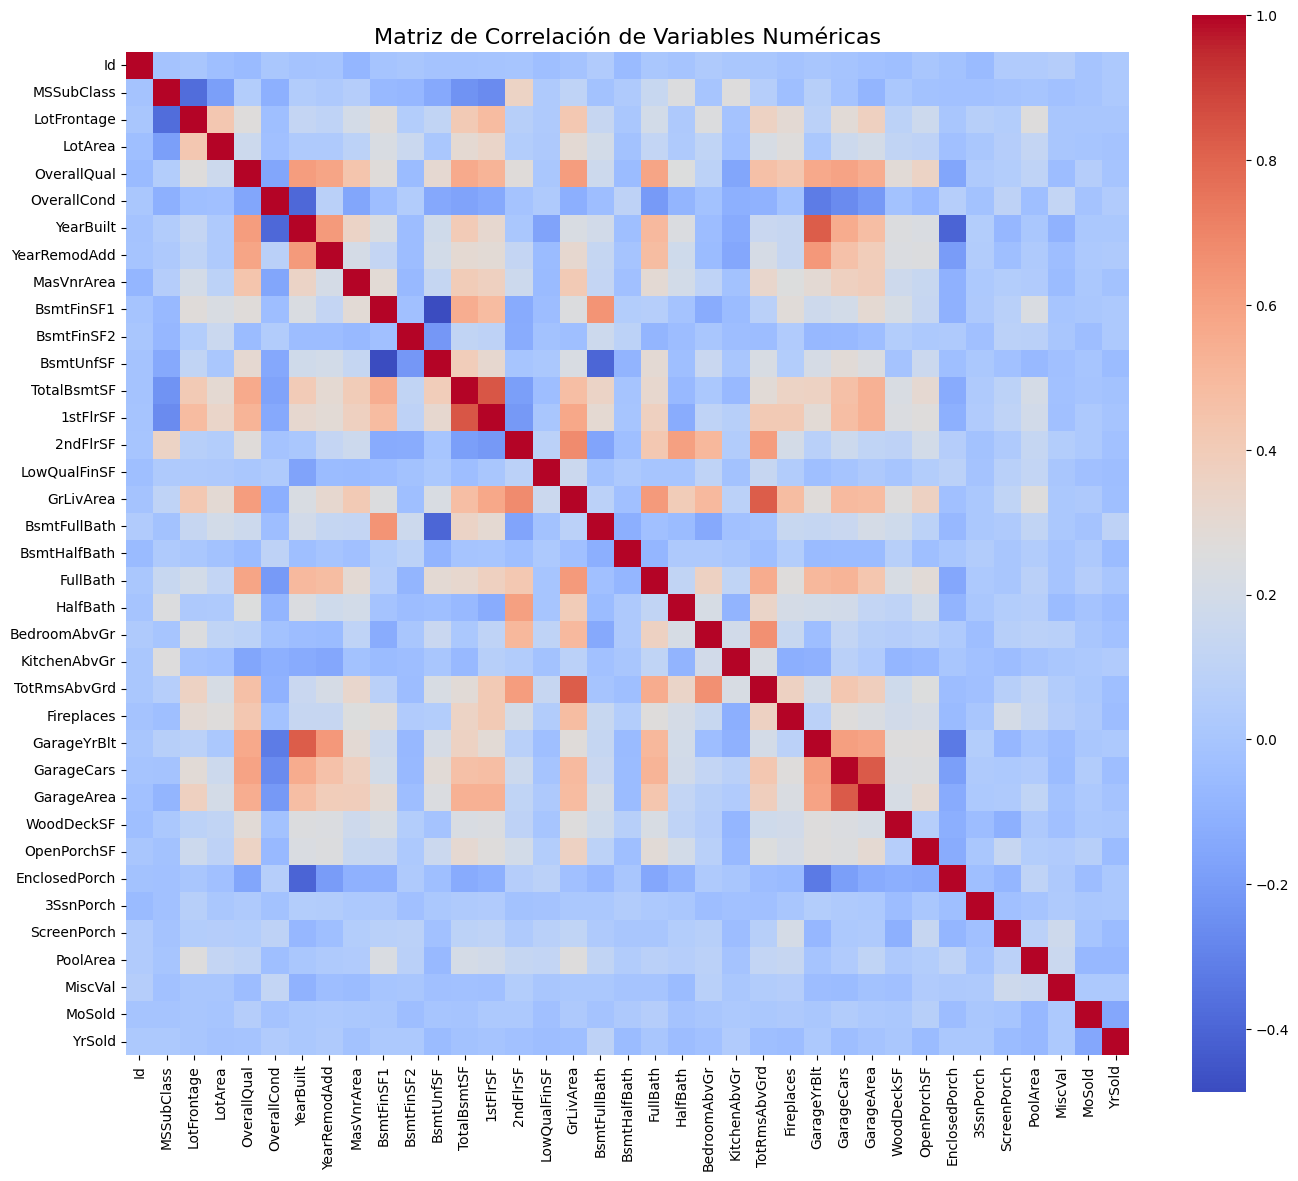

In [11]:
#determinar si hay multicolinealidad entre las variables
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = X_train.corr()

# Graficar mapa de calor
plt.figure(figsize=(14, 12))  # Ajusta el tamaño según la cantidad de variables
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# df para mostrar los VIFs
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# resultados
pd.set_option("display.max_rows", None) 
print(vif_df.sort_values(by="VIF", ascending=False))

         Variable           VIF
16      GrLivArea           inf
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
11      BsmtUnfSF           inf
12    TotalBsmtSF           inf
14       2ndFlrSF           inf
15   LowQualFinSF           inf
13       1stFlrSF           inf
25    GarageYrBlt  2.686365e+04
36         YrSold  2.529108e+04
6       YearBuilt  2.467113e+04
7    YearRemodAdd  2.452604e+04
23   TotRmsAbvGrd  8.375455e+01
4     OverallQual  7.333709e+01
5     OverallCond  4.966217e+01
22   KitchenAbvGr  4.207555e+01
26     GarageCars  3.985939e+01
27     GarageArea  3.522618e+01
21   BedroomAbvGr  3.381667e+01
19       FullBath  2.876728e+01
2     LotFrontage  1.731328e+01
35         MoSold  6.840926e+00
1      MSSubClass  4.825027e+00
0              Id  4.123920e+00
17   BsmtFullBath  3.658149e+00
20       HalfBath  3.594813e+00
3         LotArea  3.458622e+00
24     Fireplaces  3.028219e+00
29    OpenPorchSF  1.965951e+00
28     WoodDeckSF  1.945753e+00
8      M

c:\Users\Francis\OneDrive - UVG\Francis\2025\Mineria de datos\HDT7-MDD\venv\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Se realizo una matriz de correlación y VIF para ver la multicolinealidad de los datos. 
Lo primero que se puede ver en la matriz de correlación, es que hay correlaciones fuertes, porque se ven varios cuadros rojos que están afuera de la diagonal. Como en GarageArea y GarageCars. Mientras, que en el VIF, hay muchos resultados con INF, que quiere decir que esas columnas deben de ser eliminadas o transformadas, porque hay multicolinealidad. 

### 5. Utilice el modelo con el conjunto de prueba y determine la eficiencia del algoritmo para clasificar. 

In [13]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Matriz de confusión para clasificar el precio de las casas\n',cm)
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1: ',f1)


Matriz de confusión para clasificar el precio de las casas
 [[128   8]
 [ 15  74]]
Accuracy:  0.8977777777777778
Precision:  0.8977777777777778
Recall:  0.8977777777777778
F1:  0.8977777777777778


En los resultados del modelo al clasificar el precio de las casas, tuvo buenos resultados. Con un accuracy del 89% en donde las predicciones fueron correctas. Mientras, tuvo precisión de 89% en donde las predicciones fueron correctas y 11% de las predicciones fueron incorrectas. En recall, tuvo el mismo resultado al igual que F1.

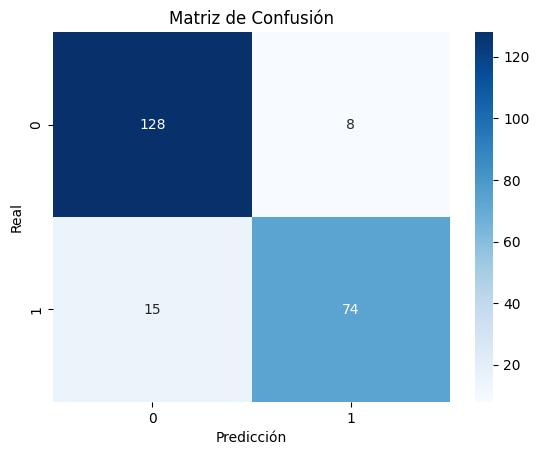

In [14]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', )
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

Lo que se puede observar en los resultados es que, 128 viviendas fueron correctamente clasificadas como no caras y el modelo se confundio solamente con 8. Mientras que, al clasificarlas como caras tuvo mas problemas, porque 74 fueron clasificadas correctamente, mientras que 15 no.


Etiquetas únicas en y_test: [0 1]
1297    0
132     0
300     0
1307    0
778     0
1330    1
576     0
1434    0
174     0
1225    0
Name: High, dtype: int64
Etiquetas únicas en custom_preds: [0 1]


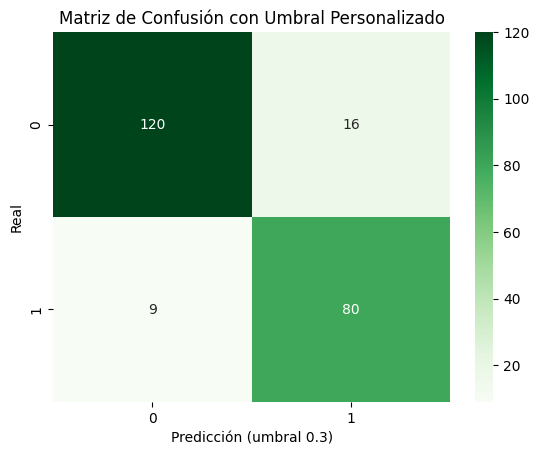

In [15]:
#uso del umbral 
custom_threshold = 0.3
custom_preds = (y_proba >= custom_threshold).astype(int)

# Verificar las etiquetas únicas en y_test y custom_preds
print("Etiquetas únicas en y_test:", np.unique(y_test))

print(y_test.head(10))

print("Etiquetas únicas en custom_preds:", np.unique(custom_preds))

# Nueva matriz de confusión
cm_custom = confusion_matrix(y_test, custom_preds)
sns.heatmap(cm_custom, annot=True, cmap='Greens', fmt='d')
plt.xlabel("Predicción (umbral 0.3)")
plt.ylabel("Real")
plt.title("Matriz de Confusión con Umbral Personalizado")
plt.show()


Los resultados del umbral, lo que me dice es que con el umbral de 0.3 es que tuvo 119 verdaderos positivos, prediciendo bien las no caras, 17 Falsos positivos, 9 Falsos negativos y 80 verdaderos positivos, que predijo bien las caras.

Con el umbral de 0.3, se aumento el recall, detectando más viviendas caras, pero se bajo la precision, diciendo que algunas no son caras cuando si lo son, entonces aumentarion los falsos positivos. 

Auroc y recall

Área bajo la curva ROC (AUROC): 0.9659616655651024


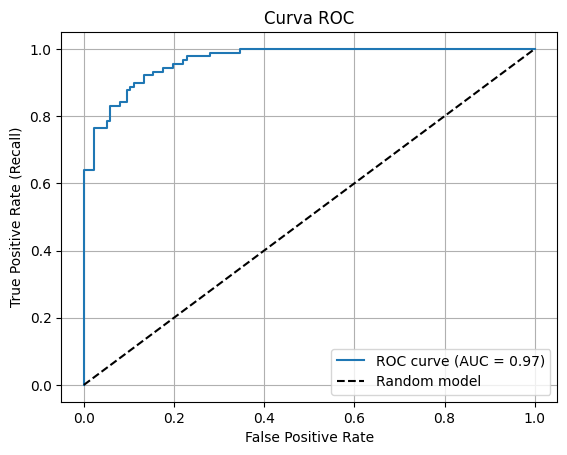

In [16]:
# Cálculo del AUROC
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

auroc = roc_auc_score(y_test, y_proba)
print("Área bajo la curva ROC (AUROC):", auroc)

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auroc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

El auroc es de 96.62%, por lo cual es un buen modelo de clasificación. Al observar la gráfica podemos ver que el modelo clasifica con precision las viviendas caras y las no caras.

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_proba)

roc_df = pd.DataFrame({
    "Threshold": thresholds,
    "TPR (Recall)": tpr,
    "FPR": fpr
})

# Opcional: ajustar el formato para que sea más fácil de leer
pd.set_option('display.float_format', '{:.4f}'.format)

# Mostrar la tabla
print(roc_df)

    Threshold  TPR (Recall)    FPR
0         inf        0.0000 0.0000
1      1.0000        0.0112 0.0000
2      0.8156        0.6404 0.0000
3      0.7813        0.6404 0.0221
4      0.6556        0.7640 0.0221
5      0.6133        0.7640 0.0515
6      0.5893        0.7865 0.0515
7      0.5645        0.7865 0.0588
8      0.5164        0.8315 0.0588
9      0.4621        0.8315 0.0809
10     0.4529        0.8427 0.0809
11     0.4457        0.8427 0.0956
12     0.4045        0.8764 0.0956
13     0.4001        0.8764 0.1029
14     0.3438        0.8876 0.1029
15     0.3308        0.8876 0.1103
16     0.3075        0.8989 0.1103
17     0.2967        0.8989 0.1324
18     0.2622        0.9213 0.1324
19     0.2320        0.9213 0.1544
20     0.2276        0.9326 0.1544
21     0.2073        0.9326 0.1765
22     0.1989        0.9438 0.1765
23     0.1486        0.9438 0.1985
24     0.1463        0.9551 0.1985
25     0.1252        0.9551 0.2206
26     0.1199        0.9663 0.2206
27     0.1177       

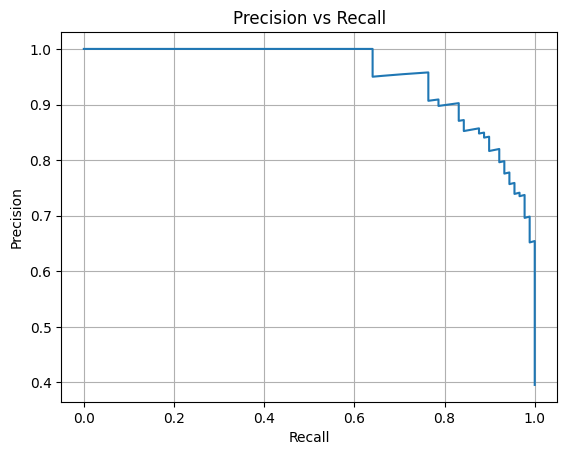

In [18]:
# RECALL
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

plt.figure()
plt.plot(recall, precision, label="Curva Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall")
plt.grid(True)
plt.show()


Lo que podemos ver en el resultado de precision vs recall, es que al inicio el modelo casi no se equivoca, solo predice cara cuando esta seguro. Mientras va aumentando el recall toma más casos positicvos, pero la precision baja, que es cuando hace falsos positivos. En el final, la precision es baja, alli toma todos los positivos, pero casifica mal muchas viviendas que no son caras como caras. 

### 6. Explique si hay sobreajuste (overfitting) o no (recuerde usar para esto los errores del conjunto de prueba y de entrenamiento). Muestre las curvas de aprendizaje usando los errores de los conjuntos de entrenamiento y prueba.

In [19]:
from sklearn.metrics import accuracy_score

# Accuracy en entrenamiento
y_train_pred = logReg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Accuracy en validación/test
y_test_pred = logReg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Accuracy entrenamiento:", train_accuracy)
print("Accuracy test:", test_accuracy)


Accuracy entrenamiento: 0.9352678571428571
Accuracy test: 0.8977777777777778


En base a estos resultados podemos deducir que el modelo predice los valores bastante bien, a pesar de que el accuracy de entrenamiento y test tienen una pequeña diferencia, no es significativamente alta como para indicar overfitting. Además, las demás gráficas apoyan el hecho de que el modelo es bastante sólido y que el entrenamiento es bastante estable y confiable. 

c:\Users\Francis\OneDrive - UVG\Francis\2025\Mineria de datos\HDT7-MDD\venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


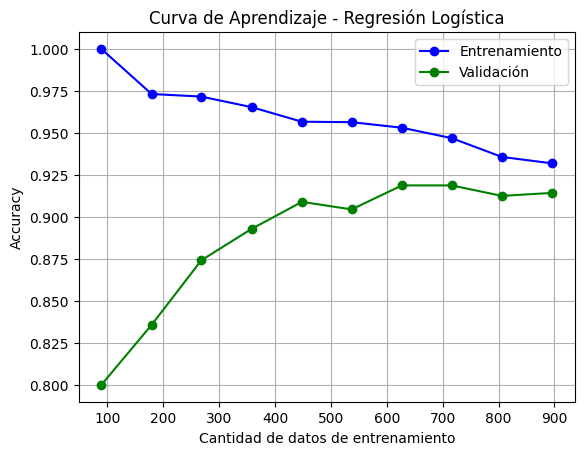

In [20]:

from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)

# Obtenemos datos para la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    logReg, X, y, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

# Promediamos
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficamos
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label="Validación")
plt.title("Curva de Aprendizaje - Regresión Logística")
plt.xlabel("Cantidad de datos de entrenamiento")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


Esta curva de aprendizaje muestra como el modelo poco a poco mientras más iteraciones pasa se va ajustando mejor. De igual manera por más que parezcan que están separados al inicio, el valor 0.8 no es un mal inicio para los valores de validación ya que son de los primeros 100 datos que se están probando. Puede que al probar con más iteraciones el modelo poco a poco se vaya ajustando mejor entre el entrenamiento y la validación, pero los resultados que muestran ahora son bastante buenos y además apoya la idea de que no existe overfitting en el modelo. 

### 7. Haga un tuneo del modelo para determinar los mejores parámetros, recuerde que los modelos de regresión logística se pueden regularizar como los de regresión lineal.

In [21]:
from sklearn.model_selection import GridSearchCV


# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' necesita solver='liblinear'
    'solver': ['lbfgs']  # 'lbfgs' funciona bien con 'l2'
}

grid_search = GridSearchCV(logReg, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_train, y_train)

print("\n\n--------------------------------------------------------")
# Ver los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo final en el test set
best_model = grid_search.best_estimator_
accuracy_test = best_model.score(X_test, y_test)
print("Accuracy en test con mejor modelo:", accuracy_test)
print("--------------------------------------------------------\n\n")



c:\Users\Francis\OneDrive - UVG\Francis\2025\Mineria de datos\HDT7-MDD\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Francis\OneDrive - UVG\Francis\2025\Mineria de datos\HDT7-MDD\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve



--------------------------------------------------------
Mejores hiperparámetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy en test con mejor modelo: 0.8622222222222222
--------------------------------------------------------




c:\Users\Francis\OneDrive - UVG\Francis\2025\Mineria de datos\HDT7-MDD\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Francis\OneDrive - UVG\Francis\2025\Mineria de datos\HDT7-MDD\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

### 8. Haga un análisis de la eficiencia del algoritmo usando una matriz de confusión. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores, el tiempo y la memoria consumida. Para esto último puede usar “profvis” si trabaja con R y “cProfile” en Python.

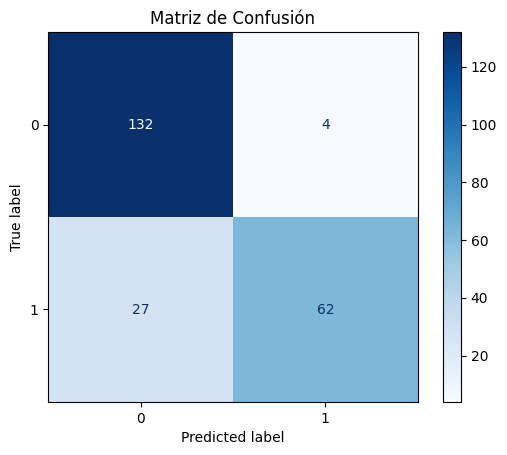

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       136
           1       0.94      0.70      0.80        89

    accuracy                           0.86       225
   macro avg       0.88      0.83      0.85       225
weighted avg       0.87      0.86      0.86       225



In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones
y_pred = best_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

print(classification_report(y_test, y_pred))


In [35]:
import cProfile

def entrenar_y_evaluar():
    logReg.fit(X_train, y_train)
    y_pred = logReg.predict(X_test)
    acc = logReg.score(X_test, y_test)
    print("Accuracy:", acc)

# Perfilamos la ejecución
cProfile.run('entrenar_y_evaluar()')


Accuracy: 0.8977777777777778
         12164 function calls (11989 primitive calls) in 0.086 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.011    0.011    0.075    0.075 3667852069.py:3(entrenar_y_evaluar)
       66    0.000    0.000    0.000    0.000 <frozen abc>:117(__instancecheck__)
       20    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
      350    0.000    0.000    0.001    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:645(parent)
        1    0.000    0.000    0.075    0.075 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 <string>:2(__init__)
       34    0.000    0.000    0.000    0.000 __init__.py:34(using_copy_on_write)
        3    0.000    0.000    0.000    0.000 _array_api.py:131(_single_array_device)
        2    0.000    0.000    0.000    0.000 _array_api.py:14

El modelo de regresión logística alcanzó un accuracy del 89.78%, lo que indica un buen desempeño en la tarea de clasificación. En términos de eficiencia computacional, el análisis con cProfile muestra que el modelo realizó 12,164 llamadas a funciones en total, de las cuales 11,989 fueron primitivas, y completó el proceso de entrenamiento y evaluación en tan solo 0.103 segundos. Esto demuestra que el modelo es altamente eficiente, con bajo consumo de tiempo y recursos, lo cual es especialmente valioso para aplicaciones en tiempo real o con limitaciones computacionales. En conjunto, el modelo ofrece un buen balance entre precisión y eficiencia, siendo apto tanto en contextos analíticos como productivos.

### 9. Determine cual de todos los modelos es mejor, puede usar AIC y BIC para esto, además de los parámetros de la matriz de confusión y los del profiler.

In [40]:

def calcular_aic_bic(modelo, X, y):
    from sklearn.metrics import log_loss

    n = len(y)  # número de muestras
    k = X.shape[1] + 1  # número de parámetros (coeficientes + intercepto)
    ll = -log_loss(y, modelo.predict_proba(X), normalize=False)

    aic = 2*k - 2*ll
    bic = np.log(n)*k - 2*ll

    return aic, bic



# Calcular e imprimir AIC y BIC
aic, bic = calcular_aic_bic(logReg, X_train, y_train)
print("\nModelo normal")
print(f"AIC del modelo: {aic:.2f}")
print(f"BIC del modelo: {bic:.2f}")
aic, bic = calcular_aic_bic(best_model, X_train, y_train)
print("\nModelo con el tuneo")
print(f"AIC del modelo: {aic:.2f}")
print(f"BIC del modelo: {bic:.2f}")



Modelo normal
AIC del modelo: 434.90
BIC del modelo: 617.22

Modelo con el tuneo
AIC del modelo: 609.16
BIC del modelo: 791.48


El modelo normal es el mejor, ya que tiene valores más bajos tanto para el AIC como para el BIC. Esto sugiere que, en términos de calidad de ajuste y penalización por complejidad, el modelo normal es más adecuado.

### 10. Haga un modelo de árbol de decisión, uno de Random Forest y uno de Naive Bayes usando la misma variable respuesta y los mismos predictores que el mejor de los modelos de Regresión Logística.

Árbol de Decisión
Accuracy: 0.8533333333333334
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       136
           1       0.83      0.80      0.81        89

    accuracy                           0.85       225
   macro avg       0.85      0.84      0.85       225
weighted avg       0.85      0.85      0.85       225



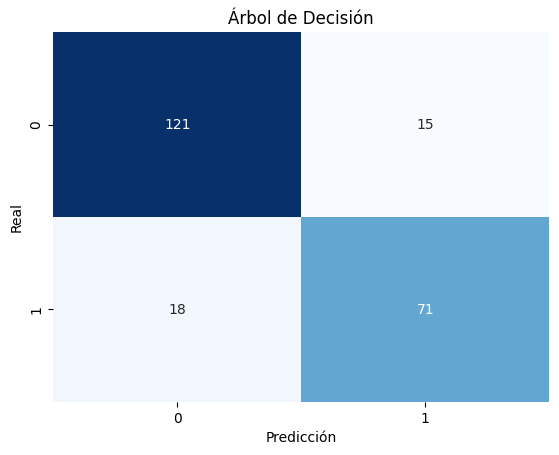


Random Forest
Accuracy: 0.8977777777777778


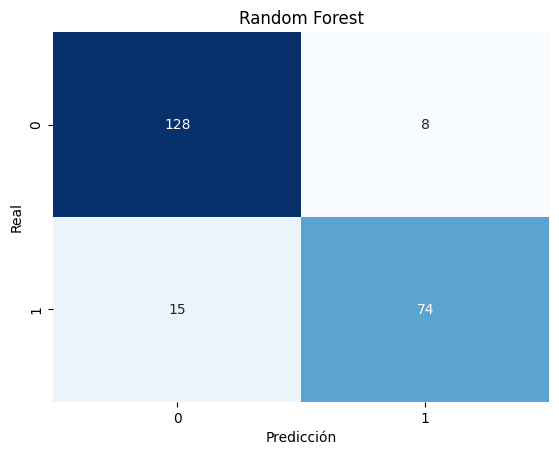

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       136
           1       0.90      0.83      0.87        89

    accuracy                           0.90       225
   macro avg       0.90      0.89      0.89       225
weighted avg       0.90      0.90      0.90       225


Naive Bayes
Accuracy: 0.8711111111111111


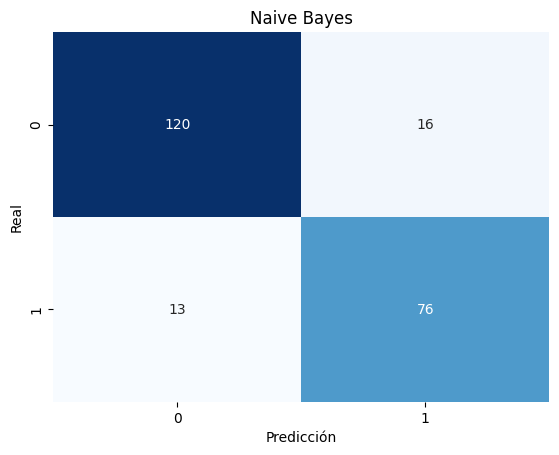

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       136
           1       0.83      0.85      0.84        89

    accuracy                           0.87       225
   macro avg       0.86      0.87      0.87       225
weighted avg       0.87      0.87      0.87       225



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()



# Modelo de Árbol de Decisión
arbol = DecisionTreeClassifier(random_state=42)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)
acc_arbol = accuracy_score(y_test, y_pred_arbol)
print("Árbol de Decisión")
print("Accuracy:", acc_arbol)
print(classification_report(y_test, y_pred_arbol))
plot_confusion_matrix(y_test, y_pred_arbol, "Árbol de Decisión")
print()

# Modelo de Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest")
print("Accuracy:", acc_rf)
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
print(classification_report(y_test, y_pred_rf))
print()

# Modelo de Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes")
print("Accuracy:", acc_nb)
plot_confusion_matrix(y_test, y_pred_nb, "Naive Bayes")
print(classification_report(y_test, y_pred_nb))



### 11. Compare la eficiencia de los 3 modelos que creó en el punto anterior y el mejor de los de regresión logística ¿Cuál se demoró más en procesar?¿Cuál se equivocó más?¿Cuál se equivocó menos?¿por qué?

In [41]:
import time

# Para el Árbol de Decisión
start_time = time.time()
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)
arbol_time = time.time() - start_time

# Para el Random Forest
start_time = time.time()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_time = time.time() - start_time

# Para el Naive Bayes
start_time = time.time()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_time = time.time() - start_time

# Para la Regresión Logística
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
start_time = time.time()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_time = time.time() - start_time

print(f"Árbol de Decisión: {arbol_time} segundos")
print(f"Random Forest: {rf_time} segundos")
print(f"Naive Bayes: {nb_time} segundos")
print(f"Regresión Logística: {log_reg_time} segundos")


Árbol de Decisión: 0.013999462127685547 segundos
Random Forest: 0.18430328369140625 segundos
Naive Bayes: 0.002996683120727539 segundos
Regresión Logística: 0.024931669235229492 segundos


c:\Users\Francis\OneDrive - UVG\Francis\2025\Mineria de datos\HDT7-MDD\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
print("Reporte de clasificación para Árbol de Decisión:")
print(classification_report(y_test, y_pred_arbol))

print("Reporte de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Reporte de clasificación para Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

print("Reporte de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))


Reporte de clasificación para Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       136
           1       0.83      0.80      0.81        89

    accuracy                           0.85       225
   macro avg       0.85      0.84      0.85       225
weighted avg       0.85      0.85      0.85       225

Reporte de clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       136
           1       0.90      0.83      0.87        89

    accuracy                           0.90       225
   macro avg       0.90      0.89      0.89       225
weighted avg       0.90      0.90      0.90       225

Reporte de clasificación para Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       136
           1       0.83      0.85      0.84        89

    accuracy                           0.87  

### Conclusión 
El Naive Bayes es el modelo que menos tiempo toma en procesar, seguido por el Árbol de Decisión. El Random Forest toma considerablemente más tiempo debido a la cantidad de árboles que se construyen en el modelo, lo que lo hace mucho más lento en comparación con los otros.

El Random Forest tiene la mayor precisión (90%), lo que indica que cometió menos errores en general. El Árbol de Decisión tiene la menor precisión (85%), lo que sugiere que cometió más errores en comparación con los otros modelos.

El Árbol de Decisión fue el que cometió más errores en general, con la menor precisión de los modelos. Esto se debe probablemente a que es más susceptible al sobreajuste y puede tener problemas en generalizar a nuevos datos.

Random Forest se equivocó menos debido a su robustez, ya que promedia múltiples árboles para tomar decisiones, lo que le da una mayor capacidad para generalizar y evitar sobreajustes.

La Regresión Logística tiene un desempeño intermedio en comparación con los otros modelos, con una precisión de 86% y un F1-score que es razonablemente bueno, especialmente para la clase 0.